In [1]:
#coding=utf-8
import numpy as np
import pandas as pd
import matplotlib.image as mp
import matplotlib.pyplot as plt
import random

In [2]:
#file = open('/Users/sunchenxi/Desktop/flame.txt')
#lines = file.readlines()
#x=[]
#y=[]
#for line in lines:
#    temp = line.replace('\n','').split(',')
#    x.append(temp[0])


In [3]:
data = pd.read_csv("/Users/sunchenxi/Desktop/大三上课程/模式识别/Course_PR_17-master/flame.txt", sep=',', header=None)

In [4]:
#数据的横纵坐标
x=[]
x=data.values[:,0]
y=[]
y=data.values[:,1]

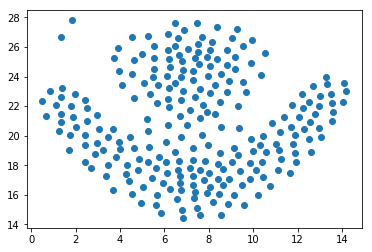

In [5]:
#显示数据
a=plt.scatter(x,y)
plt.show(a)

In [6]:
#数据在二维array
d=data.values[:,:2]
d

array([[  1.85,  27.8 ],
       [  1.35,  26.65],
       [  1.4 ,  23.25],
       [  0.85,  23.05],
       [  0.5 ,  22.35],
       [  0.65,  21.35],
       [  1.1 ,  22.05],
       [  1.35,  22.65],
       [  1.95,  22.8 ],
       [  2.4 ,  22.45],
       [  1.8 ,  22.  ],
       [  2.5 ,  21.85],
       [  2.95,  21.4 ],
       [  1.9 ,  21.25],
       [  1.35,  21.45],
       [  1.35,  20.9 ],
       [  1.25,  20.35],
       [  1.75,  20.05],
       [  2.  ,  20.6 ],
       [  2.5 ,  21.  ],
       [  1.7 ,  19.05],
       [  2.4 ,  20.05],
       [  3.05,  20.45],
       [  3.7 ,  20.45],
       [  3.45,  19.9 ],
       [  2.95,  19.5 ],
       [  2.4 ,  19.4 ],
       [  2.4 ,  18.25],
       [  2.85,  18.75],
       [  3.25,  19.05],
       [  3.95,  19.6 ],
       [  2.7 ,  17.8 ],
       [  3.45,  18.05],
       [  3.8 ,  18.55],
       [  4.  ,  19.1 ],
       [  4.45,  19.9 ],
       [  4.65,  19.15],
       [  4.85,  18.45],
       [  4.3 ,  18.05],
       [  3.35,  17.3 ],


In [5]:
#欧式距离
def distEclud(vecA,vecB):
    return np.linalg.norm(vecA-vecB)

In [6]:
 # 初始随机获取k个质心
def initCentroids(dataSet, k):   
    return random.sample(dataSet,k)  

In [7]:
# 计算每个点与centroidList中k个质心的欧式距离，找出到某个质心距离最小的并将点加入相应的簇类中  
def minDistance(dataSet, centroidList):  
    clusterDict = dict()                 # 用字典来保存簇类结果  
    for item in dataSet:  
        vec1 = np.array(item)            # 点的坐标转换成array形式  
        flag = 0                         # 簇分类标记，记录与相应簇距离最近的那个簇  
        minDis = float("inf")            # 初始化为最大值(inf)  
  
        for i in range(len(centroidList)):  # 计算点与每个质点的欧式距离，找出最小的，标记上此点在某个类的flag
            vec2 = np.array(centroidList[i])  
            distance = distEclud(vec1, vec2)   
            if distance < minDis:      
                minDis = distance  
                flag = i                         
  
        if flag not in clusterDict.keys():   # 簇标记不存在，进行初始化，字典每一个key后是一个list  
            clusterDict[flag] = list() 
            
        #print flag, item                     
        #print
        clusterDict[flag].append(item)       # 加入相应的类别中  
  
    return clusterDict                       # 返回新的聚类结果  

In [8]:
# 得到聚类后的新的k个质心  
def getCentroids(clusterDict):  
    centroidList = list()  
    for key in clusterDict.keys():  
        centroid = np.mean(np.array(clusterDict[key]), axis = 0)  # 找到质心，使用类均值 
        #print key, centroid                                      #输出显示
        #print
        centroidList.append(centroid)  
    return np.array(centroidList).tolist()  

In [9]:
# 计算簇集合间的均方误差 ,将簇类中各个向量与质心的距离进行累加求和  
def getVar(clusterDict, centroidList):   
    sum = 0.0  
    for key in clusterDict.keys():  
        vec1 = np.array(centroidList[key])  
        distance = 0.0  
        for item in clusterDict[key]:  
            vec2 = np.array(item)  
            distance += distEclud(vec1, vec2)  
        sum += distance  
  
    return sum  

In [12]:
# 聚类结果画图  
def showCluster(centroidList, clusterDict):  
    colorMark = ['or', 'ob', 'og', 'ok', 'oy', 'ow']      # 不同簇类的标记 'or' --> 'o'代表圆，'r'代表red
    centroidMark = ['dr', 'db', 'dg', 'dk', 'dy', 'dw']   # 质心标记 同上'd'代表棱形  
    for key in clusterDict.keys():  
        plt.plot(centroidList[key][0], centroidList[key][1], centroidMark[key], markersize = 12)  # 画质心点  
        for item in clusterDict[key]:  
            plt.plot(item[0], item[1], colorMark[key]) # 画簇类下的点  

    plt.show()  

In [15]:
centroidList = initCentroids(d, 2)           # 初始化质心 
clusterDict = minDistance(d, centroidList)   # 第一次聚类迭代  
newVar = getVar(clusterDict, centroidList)  # 获得均方误差值，通过新旧均方误差来获得迭代终止条件
oldVar = -0.0001 

***** 第1次迭代 *****



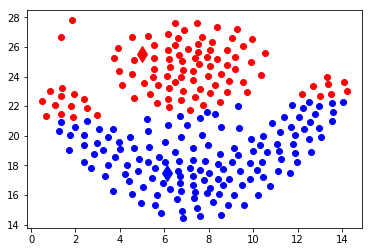

***** 第2次迭代 *****



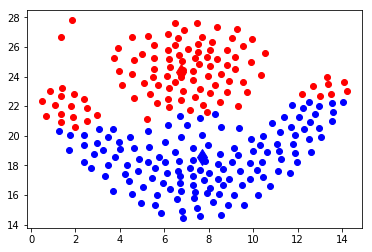

***** 第3次迭代 *****



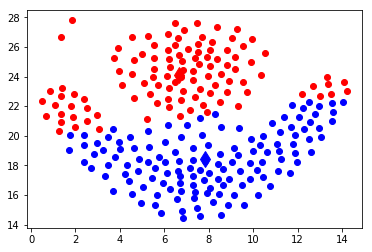

***** 第4次迭代 *****



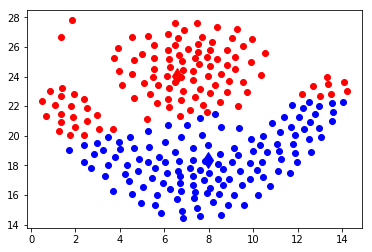

***** 第5次迭代 *****



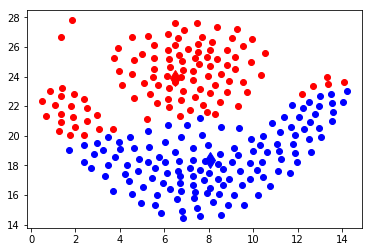

***** 第6次迭代 *****



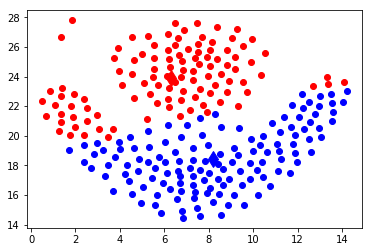

***** 第7次迭代 *****



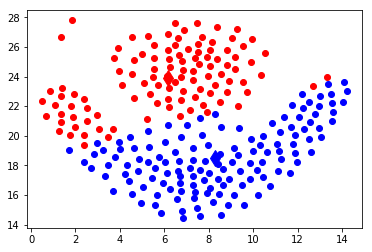

***** 第8次迭代 *****



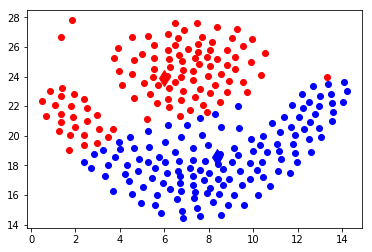

***** 第9次迭代 *****



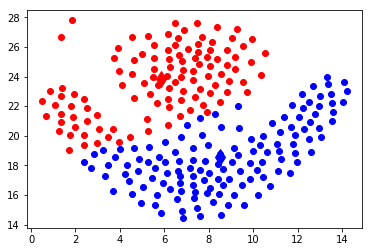

***** 第10次迭代 *****



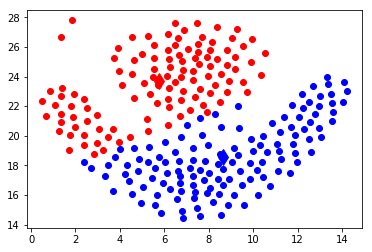

***** 第11次迭代 *****



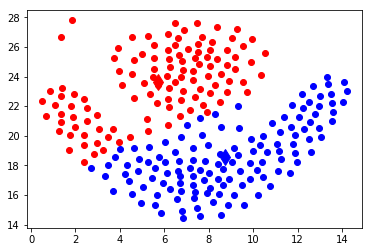

***** 第12次迭代 *****



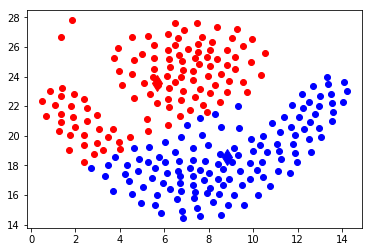

***** 第13次迭代 *****



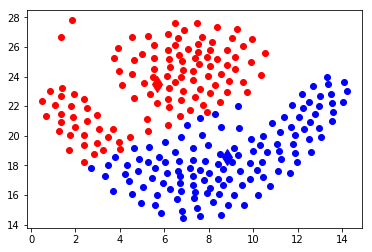

***** 第14次迭代 *****



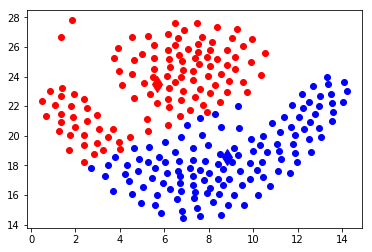

In [16]:
    print '***** 第1次迭代 *****'  
    print    
   # for key in clusterDict.keys():  
   #     print '第',key,'类： ', clusterDict[key]  
   # print 'k个均值向量: ', centroidList  
   # print '平均均方误差: ', newVar  
   # print   
    showCluster(centroidList, clusterDict)             # 展示聚类结果  
    
    i = 2 
    while abs(newVar - oldVar) >= 0.0001:              # 当连续两次聚类结果小于0.0001时，迭代结束            
        centroidList = getCentroids(clusterDict)          # 获得新的质心  
        clusterDict = minDistance(d, centroidList)  # 新的聚类结果  
        oldVar = newVar                                     
        newVar = getVar(clusterDict, centroidList)  
  
        print '***** 第%d次迭代 *****' % i  
        print   
     #   print '簇类'  
     #   for key in clusterDict.keys():  
     #       print '第',key,'类： ', clusterDict[key]  
     #   print 'k个均值向量: ', centroidList  
     #   print '平均均方误差: ', newVar  
     #   print  
        showCluster(centroidList, clusterDict)            # 展示聚类结果  
  
        i += 1  